In [303]:
## Import Libraries
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from io import StringIO

In [304]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8]
pd.plotting.register_matplotlib_converters()
plt.style.use('seaborn-dark')

In [305]:
download_link = 'https://www.arcgis.com/sharing/rest/content/items/f10774f1c63e40168479a1feb6c7ca74/data'
# see https://www.arcgis.com/home/item.html?id=dd4580c810204019a7b8eb3e0b329dd6
# new source https://www.arcgis.com/home/item.html?id=f10774f1c63e40168479a1feb6c7ca74

In [306]:
req = requests.get(download_link)
rki_raw = pd.read_csv(StringIO(req.text))

In [307]:
rki_raw.tail()

FID  IdBundesland Bundesland            Landkreis Altersgruppe  \
1409206  1409207            16  Thüringen  LK Altenburger Land         A80+   
1409207  1409208            16  Thüringen  LK Altenburger Land         A80+   
1409208  1409209            16  Thüringen  LK Altenburger Land         A80+   
1409209  1409210            16  Thüringen  LK Altenburger Land         A80+   
1409210  1409211            16  Thüringen  LK Altenburger Land         A80+   

        Geschlecht  AnzahlFall  AnzahlTodesfall           Meldedatum  \
1409206          W           2                0  2021/03/06 00:00:00   
1409207          W           1                0  2021/03/10 00:00:00   
1409208          W           1                0  2021/03/11 00:00:00   
1409209          W           1                0  2021/03/12 00:00:00   
1409210          W           1                0  2021/03/14 00:00:00   

         IdLandkreis             Datenstand  NeuerFall  NeuerTodesfall  \
1409206        16077  16.03.2021, 00:00 Uhr          0              -9   
1409207        16077  16.03.2021, 00:00 Uhr          0              -9   
1409208        16077  16.03.2021, 00:00 Uhr          0              -9   
1409209        16077  16.03.2021, 00:00 Uhr          0              -9   
1409210        16077  16.03.2021, 00:00 Uhr          1              -9   

                    Refdatum  NeuGenesen  AnzahlGenesen  IstErkrankungsbeginn  \
1409206  2021/03/06 00:00:00          -9              0                     0   
1409207  2021/03/10 00:00:00          -9              0                     0   
1409208  2021/03/11 00:00:00          -9              0                     0   
1409209  2021/03/12 00:00:00          -9              0                     0   
1409210  2021/03/14 00:00:00          -9              0                     0   

             Altersgruppe2  
1409206  Nicht übermittelt  
1409207  Nicht übermittelt  
1409208  Nicht übermittelt  
1409209  Nicht übermittelt  
1409210  Nicht übermittelt

In [308]:
set(rki_raw['Altersgruppe'])

{'A00-A04', 'A05-A14', 'A15-A34', 'A35-A59', 'A60-A79', 'A80+', 'unbekannt'}

In [309]:
rki_raw_60 = rki_raw[~rki_raw.Altersgruppe.isin(['A60-A79', 'A80+'])].copy()

In [310]:
rki_raw_under60 = rki_raw[~rki_raw.Altersgruppe.isin(['A60-A79', 'A80+'])].copy()

In [311]:
rki_raw_80 = rki_raw[rki_raw.Altersgruppe.isin(['A80+'])].copy()

In [312]:
rki_raw_80_death = rki_raw_80[rki_raw_80.NeuerTodesfall.isin([0, 1])].copy()

In [313]:
rki_raw_80_death.sort_values(by='Meldedatum').tail()

FID  IdBundesland          Bundesland      Landkreis  \
654215    654216             8   Baden-Württemberg   LK Göppingen   
1198052  1198053            12         Brandenburg   LK Oberhavel   
822197    822198             8   Baden-Württemberg  LK Ravensburg   
765864    765865             8   Baden-Württemberg    LK Rottweil   
27755      27756             1  Schleswig-Holstein    LK Segeberg   

        Altersgruppe Geschlecht  AnzahlFall  AnzahlTodesfall  \
654215          A80+          M           1                1   
1198052         A80+          W           1                1   
822197          A80+          M           1                1   
765864          A80+          W           1                1   
27755           A80+          M           1                1   

                  Meldedatum  IdLandkreis             Datenstand  NeuerFall  \
654215   2021/03/13 00:00:00         8117  16.03.2021, 00:00 Uhr          0   
1198052  2021/03/13 00:00:00        12065  16.03.2021, 00:00 Uhr          0   
822197   2021/03/13 00:00:00         8436  16.03.2021, 00:00 Uhr          0   
765864   2021/03/14 00:00:00         8325  16.03.2021, 00:00 Uhr          0   
27755    2021/03/15 00:00:00         1060  16.03.2021, 00:00 Uhr          1   

         NeuerTodesfall             Refdatum  NeuGenesen  AnzahlGenesen  \
654215                1  2021/03/13 00:00:00          -9              0   
1198052               1  2021/03/09 00:00:00          -9              0   
822197                1  2021/03/13 00:00:00          -9              0   
765864                0  2021/03/03 00:00:00          -9              0   
27755                 1  2021/03/15 00:00:00          -9              0   

         IstErkrankungsbeginn      Altersgruppe2  
654215                      0  Nicht übermittelt  
1198052                     1  Nicht übermittelt  
822197                      0  Nicht übermittelt  
765864                      1  Nicht übermittelt  
27755                       0  Nicht übermittelt

In [314]:
def new_cases_by_date(rki_raw, rki_flag_column='Neuer Fall', rki_count_columns='AnzahlFall'):
    """
    rki_raw: raw DataFrame from Robert Koch Institute
    """
    condition = rki_raw[rki_flag_column].isin((0, 1))
    rki_series = rki_raw[condition].groupby('Meldedatum').sum()[rki_count_columns].copy()
    rki_series.index = pd.to_datetime(rki_series.index)
    rki_series.sort_index(inplace=True)
    return rki_series

In [315]:
def process_raw_df(raw_df):
    rki_cases = new_cases_by_date(raw_df, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall')
    rki_death = new_cases_by_date(raw_df, rki_flag_column='NeuerTodesfall', rki_count_columns='AnzahlTodesfall')
    rki_recovered = new_cases_by_date(raw_df, rki_flag_column='NeuGenesen', rki_count_columns='AnzahlGenesen')
    rki_df = pd.concat([rki_cases, rki_death, rki_recovered], axis=1, sort=True)
    columns_dict = {'AnzahlFall': 'NewCases', 'AnzahlTodesfall': 'NewDeathRKI', 'AnzahlGenesen': 'NewRecoveredRKI'}
    rki_df.rename(columns_dict, axis=1, inplace=True)
    rki_df['Case Fatality'] = rki_df.NewDeathRKI / rki_df.NewCases * 100
    rki_df.replace(np.nan, 0, inplace=True)
    return rki_df

In [316]:
rki_raw_fb = rki_raw[rki_raw.Landkreis.isin(['SK Flensburg'])].copy()
rki_raw_fb.tail()

FID  IdBundesland          Bundesland     Landkreis Altersgruppe  \
1379  1380             1  Schleswig-Holstein  SK Flensburg    unbekannt   
1380  1381             1  Schleswig-Holstein  SK Flensburg    unbekannt   
1381  1382             1  Schleswig-Holstein  SK Flensburg    unbekannt   
1382  1383             1  Schleswig-Holstein  SK Flensburg    unbekannt   
1383  1384             1  Schleswig-Holstein  SK Flensburg    unbekannt   

     Geschlecht  AnzahlFall  AnzahlTodesfall           Meldedatum  \
1379  unbekannt           1                0  2021/01/09 00:00:00   
1380  unbekannt           1                0  2021/01/09 00:00:00   
1381  unbekannt           1                0  2021/01/10 00:00:00   
1382  unbekannt           1                0  2021/01/22 00:00:00   
1383          W           1                0  2021/01/10 00:00:00   

      IdLandkreis             Datenstand  NeuerFall  NeuerTodesfall  \
1379         1001  16.03.2021, 00:00 Uhr          0              -9   
1380         1001  16.03.2021, 00:00 Uhr          0              -9   
1381         1001  16.03.2021, 00:00 Uhr          0              -9   
1382         1001  16.03.2021, 00:00 Uhr          0              -9   
1383         1001  16.03.2021, 00:00 Uhr          0              -9   

                 Refdatum  NeuGenesen  AnzahlGenesen  IstErkrankungsbeginn  \
1379  2021/01/07 00:00:00           0              1                     1   
1380  2021/01/09 00:00:00           0              1                     0   
1381  2021/01/10 00:00:00           0              1                     0   
1382  2021/01/22 00:00:00           0              1                     0   
1383  2021/01/07 00:00:00           0              1                     1   

          Altersgruppe2  
1379  Nicht übermittelt  
1380  Nicht übermittelt  
1381  Nicht übermittelt  
1382  Nicht übermittelt  
1383  Nicht übermittelt

In [317]:
rki_raw_kln = rki_raw[rki_raw.Landkreis.isin(['SK Köln'])].copy()
rki_raw_kln.tail()

FID  IdBundesland           Bundesland Landkreis Altersgruppe  \
267495  267496             5  Nordrhein-Westfalen   SK Köln      A60-A79   
267496  267497             5  Nordrhein-Westfalen   SK Köln      A60-A79   
267497  267498             5  Nordrhein-Westfalen   SK Köln      A60-A79   
267498  267499             5  Nordrhein-Westfalen   SK Köln      A60-A79   
267499  267500             5  Nordrhein-Westfalen   SK Köln      A60-A79   

       Geschlecht  AnzahlFall  AnzahlTodesfall           Meldedatum  \
267495          W           2                0  2020/10/12 00:00:00   
267496          W           1                0  2020/10/12 00:00:00   
267497          W           1                0  2020/10/13 00:00:00   
267498          W           2                0  2020/10/13 00:00:00   
267499          W           1                0  2020/10/13 00:00:00   

        IdLandkreis             Datenstand  NeuerFall  NeuerTodesfall  \
267495         5315  16.03.2021, 00:00 Uhr          0              -9   
267496         5315  16.03.2021, 00:00 Uhr          0              -9   
267497         5315  16.03.2021, 00:00 Uhr          0              -9   
267498         5315  16.03.2021, 00:00 Uhr          0              -9   
267499         5315  16.03.2021, 00:00 Uhr          0              -9   

                   Refdatum  NeuGenesen  AnzahlGenesen  IstErkrankungsbeginn  \
267495  2020/10/05 00:00:00           0              2                     1   
267496  2020/10/09 00:00:00           0              1                     1   
267497  2020/10/04 00:00:00           0              1                     1   
267498  2020/10/08 00:00:00           0              2                     1   
267499  2020/10/11 00:00:00           0              1                     1   

            Altersgruppe2  
267495  Nicht übermittelt  
267496  Nicht übermittelt  
267497  Nicht übermittelt  
267498  Nicht übermittelt  
267499  Nicht übermittelt

In [318]:
rki_fb_cases = new_cases_by_date(rki_raw_fb, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall')
rki_kln_cases = new_cases_by_date(rki_raw_kln, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall')


In [319]:
rki_kln_incidence = rki_kln_cases.rolling(7).sum() / 1017000 * 100000

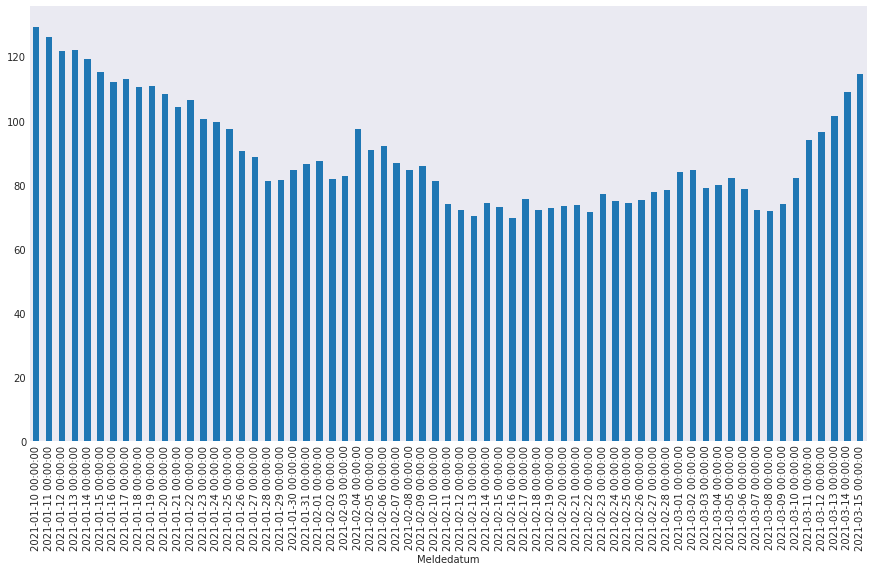

In [320]:
rki_kln_incidence['01-10-2021':].plot.bar()

In [321]:
rki_kln_incidence.tail()

Meldedatum
2021-03-11     93.805310
2021-03-12     96.558505
2021-03-13    101.474926
2021-03-14    108.947886
2021-03-15    114.552606
Name: AnzahlFall, dtype: float64

In [322]:
rki_kln = process_raw_df(rki_raw_kln)

In [323]:
rki_under60 = process_raw_df(rki_raw_60)
rki_under60.tail()

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality
Meldedatum                                                       
2021-03-11     10685          2.0              169       0.018718
2021-03-12     10238          1.0               98       0.009768
2021-03-13      8523          0.0               41       0.000000
2021-03-14      3971          0.0               27       0.000000
2021-03-15      3005          3.0               11       0.099834

In [324]:
set(rki_raw['Altersgruppe'])

{'A00-A04', 'A05-A14', 'A15-A34', 'A35-A59', 'A60-A79', 'A80+', 'unbekannt'}

In [325]:
rki_raw_under80 = rki_raw[~rki_raw.Altersgruppe.isin(['A80+'])].copy()
rki_under80 = process_raw_df(rki_raw_under80)
rki_under80.tail()

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality
Meldedatum                                                       
2021-03-11     12413          9.0              218       0.072505
2021-03-12     11872          6.0              124       0.050539
2021-03-13      9854          2.0               47       0.020296
2021-03-14      4551          0.0               29       0.000000
2021-03-15      3540          3.0               13       0.084746

In [326]:
rki_raw_60to80 = rki_raw[rki_raw.Altersgruppe.isin(['A60-A79'])].copy()
rki_60to80 = process_raw_df(rki_raw_60to80)
rki_60to80.tail()

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality
Meldedatum                                                       
2021-03-11      1728          7.0               49       0.405093
2021-03-12      1634          5.0               26       0.305998
2021-03-13      1331          2.0                6       0.150263
2021-03-14       580          0.0                2       0.000000
2021-03-15       535          0.0                2       0.000000

In [327]:
rki = process_raw_df(rki_raw)
# using estimates for recovery dates and death dates
shift_recovery = 14 # days
shift_death = 20 # days
rki['NewRecovered'] = rki.NewRecoveredRKI.shift(shift_recovery).fillna(0)
rki['NewDeath'] = rki.NewDeathRKI.shift(shift_death).fillna(0)
s = rki['NewRecoveredRKI'].copy()
s.values[:-shift_recovery] = 0.
rki['NewRecovered'] += s
s = rki['NewDeathRKI'].copy()
s.values[:-shift_death] = 0.
rki['NewDeath'] += s
rki.fillna(value=0., inplace=True)
rki.tail()

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality  \
Meldedatum                                                          
2021-03-11     13021         19.0              223       0.145918   
2021-03-12     12363         10.0              127       0.080887   
2021-03-13     10305          7.0               49       0.067928   
2021-03-14      4725          1.0               29       0.021164   
2021-03-15      3758          4.0               13       0.106440   

            NewRecovered  NewDeath  
Meldedatum                          
2021-03-11        7232.0     178.0  
2021-03-12        6773.0     118.0  
2021-03-13        5383.0      81.0  
2021-03-14        2473.0     133.0  
2021-03-15        3010.0     146.0

In [328]:
rki80 = process_raw_df(rki_raw_80) # only age 80+
rki80.tail()

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality
Meldedatum                                                       
2021-03-11       608         10.0              5.0       1.644737
2021-03-12       491          4.0              3.0       0.814664
2021-03-13       451          5.0              2.0       1.108647
2021-03-14       174          1.0              0.0       0.574713
2021-03-15       218          1.0              0.0       0.458716

Text(0.5, 1.0, 'Case Fatality Germany for cases aged 80 or above (%)')

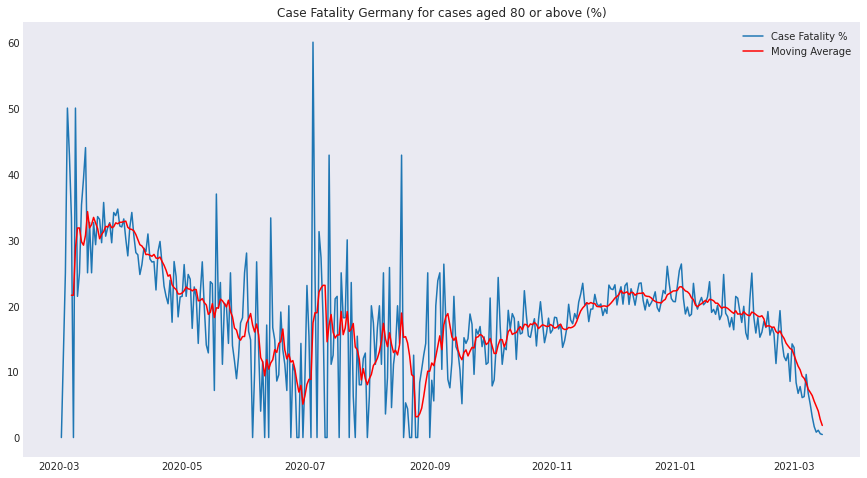

In [329]:
#rki60er['Case Fatality']['10-01-2020':].plot.bar()
start_date = '03-01-2020'
x = rki80[start_date:].index
plt.plot(x, rki80['Case Fatality'][start_date:], label='Case Fatality %')
plt.plot(x, rki80['Case Fatality'].rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Case Fatality Germany for cases aged 80 or above (%)')

Text(0.5, 1.0, 'Fatalities by date of PCR positive test for ages 80+ Germany')

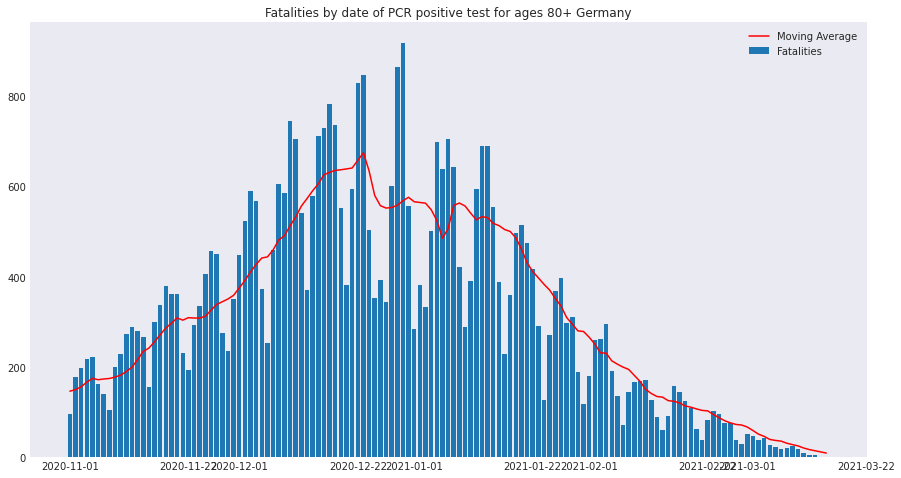

In [330]:
start_date = '11-01-2020'
x = rki80[start_date:].index
plt.bar(x, rki80.NewDeathRKI[start_date:], label='Fatalities')
plt.plot(x, rki80.NewDeathRKI.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Fatalities by date of PCR positive test for ages 80+ Germany')

In [331]:
rki['Cases'] = rki['NewCases'].cumsum()
rki['Death'] = rki['NewDeath'].cumsum()
rki['Recovered'] = rki['NewRecovered'].cumsum()
rki['ActiveCases'] = rki['Cases'] - rki['Recovered'] - rki['Death']
rki['Growth'] = rki['NewCases'] / rki['ActiveCases']
rki.tail(10)

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality  \
Meldedatum                                                          
2021-03-06      8316         34.0             1286       0.408850   
2021-03-07      3370         27.0              333       0.801187   
2021-03-08      4825         36.0              335       0.746114   
2021-03-09     11484         38.0              573       0.330895   
2021-03-10     13966         29.0              441       0.207647   
2021-03-11     13021         19.0              223       0.145918   
2021-03-12     12363         10.0              127       0.080887   
2021-03-13     10305          7.0               49       0.067928   
2021-03-14      4725          1.0               29       0.021164   
2021-03-15      3758          4.0               13       0.106440   

            NewRecovered  NewDeath    Cases    Death  Recovered  ActiveCases  \
Meldedatum                                                                     
2021-03-06        7013.0     122.0  2503512  72079.0  2327535.0     103898.0   
2021-03-07        2571.0     186.0  2506882  72265.0  2330106.0     104511.0   
2021-03-08        3132.0     269.0  2511707  72534.0  2333238.0     105935.0   
2021-03-09        7702.0     255.0  2523191  72789.0  2340940.0     109462.0   
2021-03-10        8433.0     211.0  2537157  73000.0  2349373.0     114784.0   
2021-03-11        7232.0     178.0  2550178  73178.0  2356605.0     120395.0   
2021-03-12        6773.0     118.0  2562541  73296.0  2363378.0     125867.0   
2021-03-13        5383.0      81.0  2572846  73377.0  2368761.0     130708.0   
2021-03-14        2473.0     133.0  2577571  73510.0  2371234.0     132827.0   
2021-03-15        3010.0     146.0  2581329  73656.0  2374244.0     133429.0   

              Growth  
Meldedatum            
2021-03-06  0.080040  
2021-03-07  0.032245  
2021-03-08  0.045547  
2021-03-09  0.104913  
2021-03-10  0.121672  
2021-03-11  0.108152  
2021-03-12  0.098223  
2021-03-13  0.078840  
2021-03-14  0.035573  
2021-03-15  0.028165

Text(0.5, 1.0, 'Neue Fälle RKI nach Meldedatum')

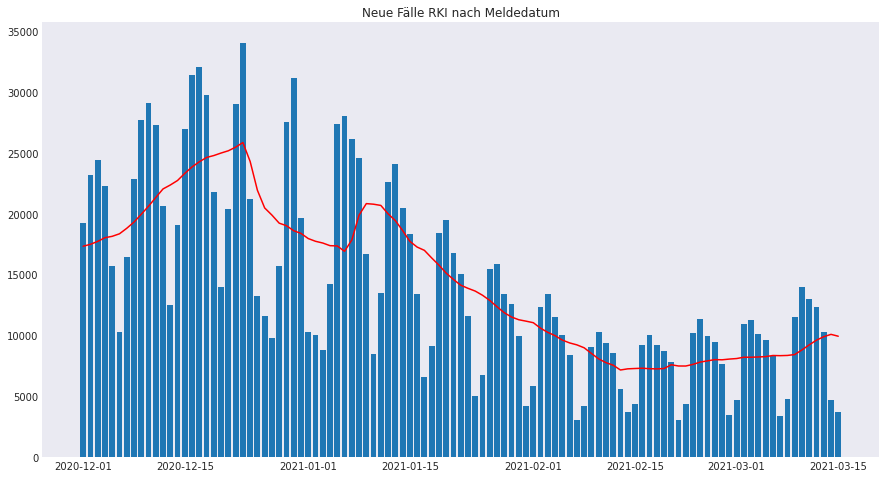

In [332]:
start_date = '12-01-2020'
x = rki[start_date:].index
plt.bar(x, rki.NewCases[start_date:], label='Growth')
plt.plot(x, rki.NewCases.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.title("Neue Fälle RKI nach Meldedatum")

<BarContainer object of 173 artists>

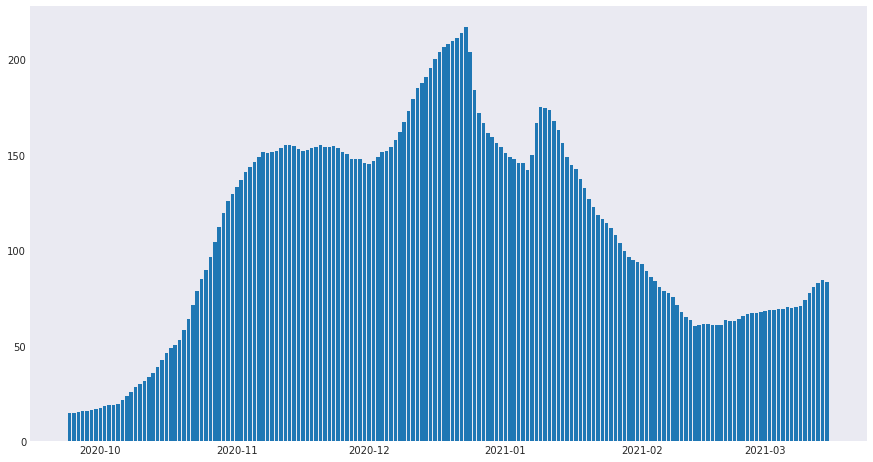

In [333]:

incidence = rki.NewCases.rolling(7).sum() /  83450000 * 100000
start_date = '09-24-2020'
x = incidence[start_date:].index
plt.bar(x, incidence[start_date:])

In [334]:
incidence.tail(10)

Meldedatum
2021-03-06    70.147394
2021-03-07    70.031156
2021-03-08    70.185740
2021-03-09    70.800479
2021-03-10    73.986818
2021-03-11    77.472738
2021-03-12    80.701019
2021-03-13    83.084482
2021-03-14    84.708209
2021-03-15    83.429599
Name: NewCases, dtype: float64

Text(0.5, 1.0, 'New Cases by date of PCR positive test for ages 80+ Germany')

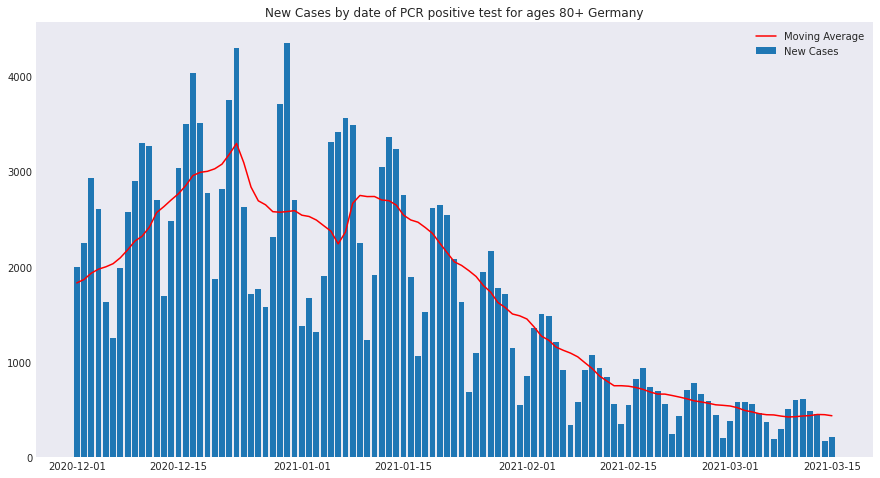

In [335]:
start_date = '12-01-2020'
x = rki80[start_date:].index
plt.bar(x, rki80.NewCases[start_date:], label='New Cases')
plt.plot(x, rki80.NewCases.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('New Cases by date of PCR positive test for ages 80+ Germany')

Text(0.5, 1.0, 'New Cases by date of PCR positive test for ages under 60 Germany')

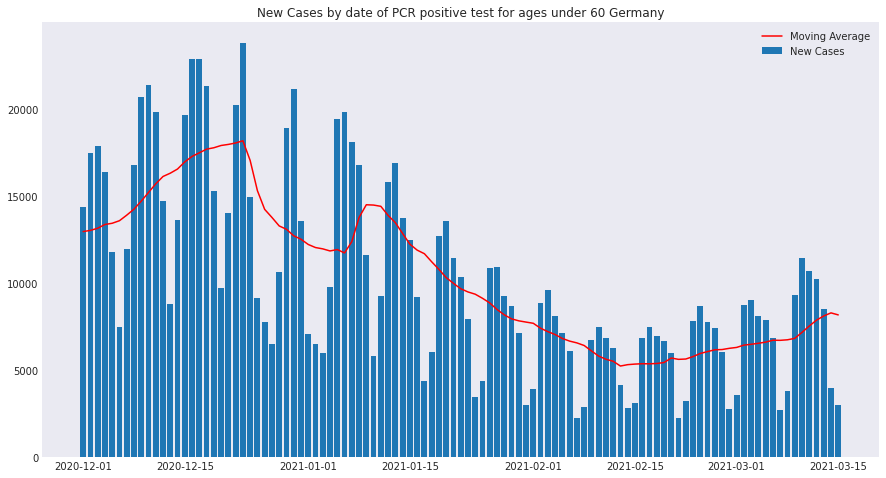

In [336]:
start_date = '12-01-2020'
x = rki_under60[start_date:].index
plt.bar(x, rki_under60.NewCases[start_date:], label='New Cases')
plt.plot(x, rki_under60.NewCases.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('New Cases by date of PCR positive test for ages under 60 Germany')

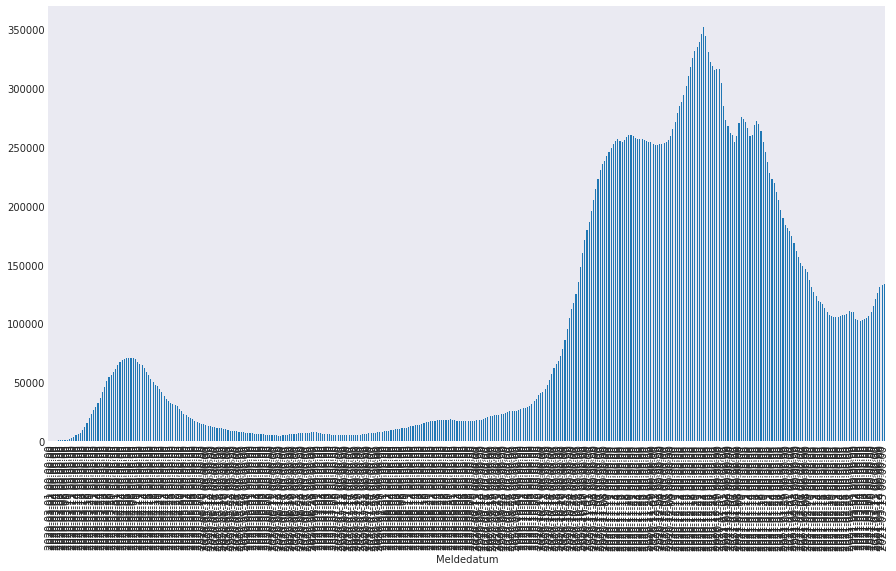

In [337]:
rki.ActiveCases['03-01-2020':].plot.bar()

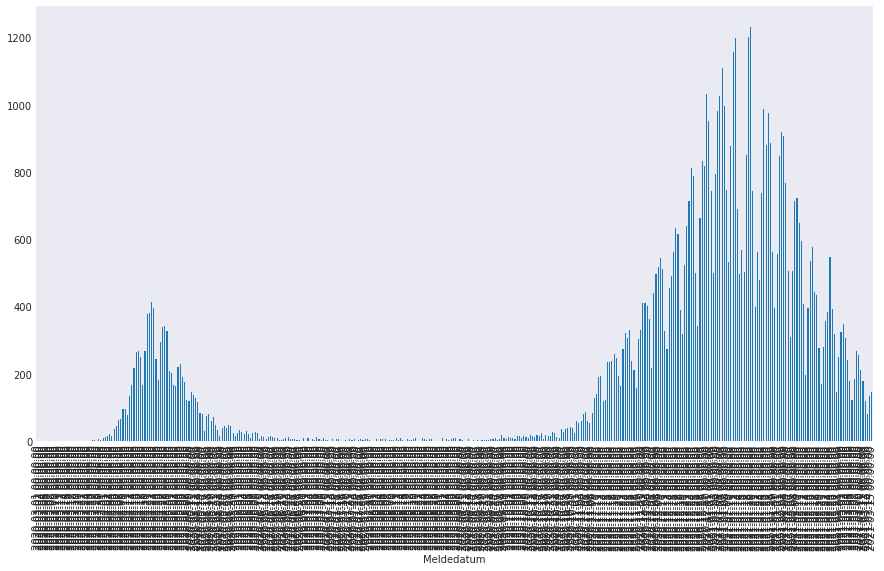

In [338]:
rki.NewDeath['03-01-2020':].plot.bar()

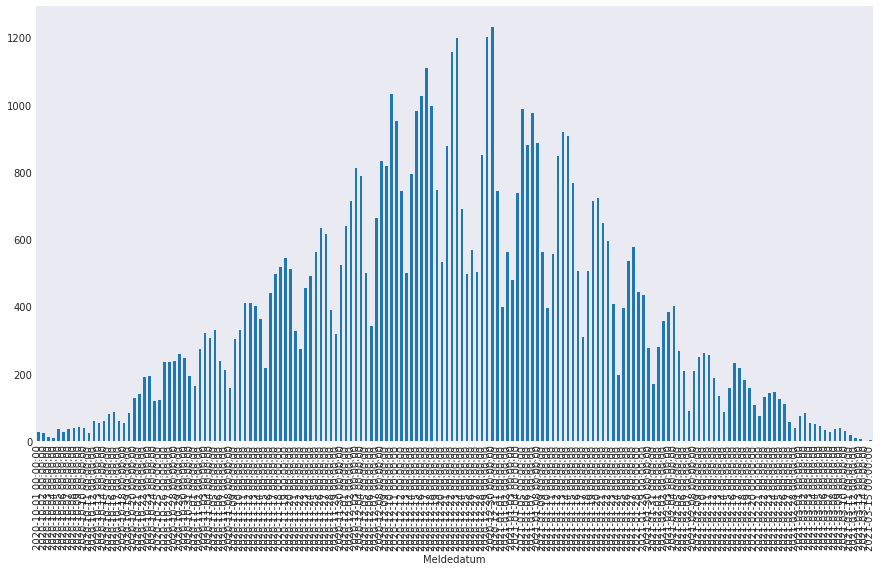

In [339]:
rki.NewDeathRKI['10-01-2020':].plot.bar()

Text(0.5, 1.0, 'Fatalities by PCR reporting date in Germany')

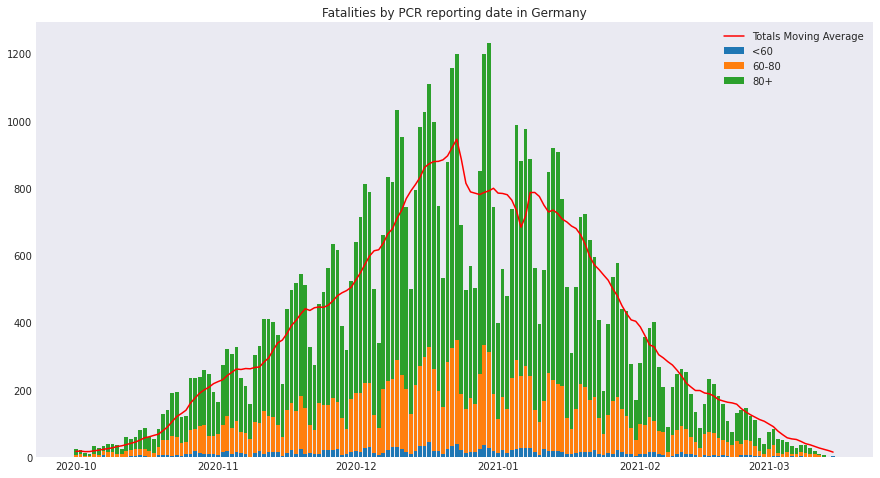

In [340]:
df = pd.DataFrame({'<60':rki_under60.NewDeathRKI, '60-80':rki_60to80.NewDeathRKI, '80+':rki80.NewDeathRKI})
df.fillna(0, inplace=True)
#df['10-01-2020':].plot.bar(label='Fatalities under 60 years', stacked=True)
start_date = '10-01-2020'
x = rki[start_date:].index
plt.bar(x, rki_under60.NewDeathRKI[start_date:], label='<60')
offset = rki_under60.NewDeathRKI[start_date:]
plt.bar(x, rki_60to80.NewDeathRKI[start_date:], label='60-80', bottom=offset)
offset = rki_under60.NewDeathRKI[start_date:] + rki_60to80.NewDeathRKI[start_date:]
plt.bar(x, rki80.NewDeathRKI[start_date:], label='80+', bottom=offset)
#plt.bar(x, rki80.NewDeathRKI[start_date:], label='New Cases')
plt.plot(x, rki.NewDeathRKI.rolling(7).sum()[start_date:] / 7, label='Totals Moving Average', color='red')
plt.legend(loc='best')
plt.title('Fatalities by PCR reporting date in Germany')

Text(0.5, 1.0, 'Growth Germany')

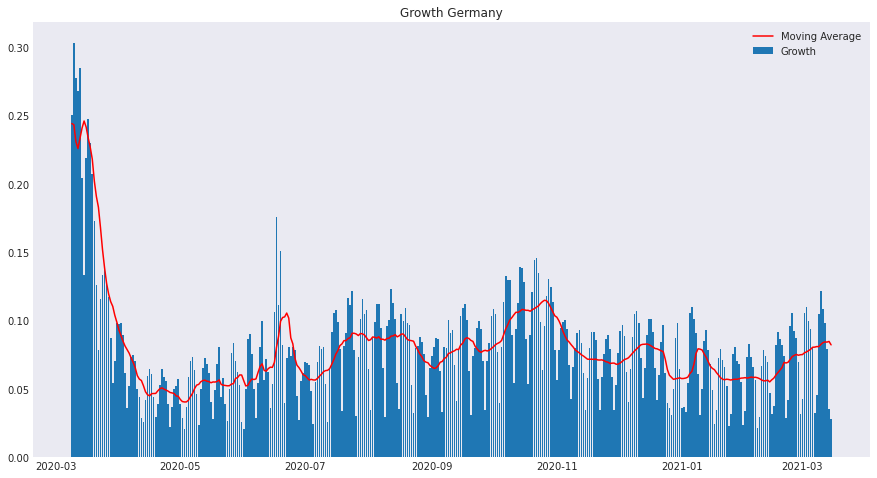

In [341]:
start_date = '03-09-2020'
x = rki[start_date:].index
plt.bar(x, rki.Growth[start_date:], label='Growth')
plt.plot(x, rki.Growth.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Growth Germany')

Text(0.5, 1.0, 'Growth Germany')

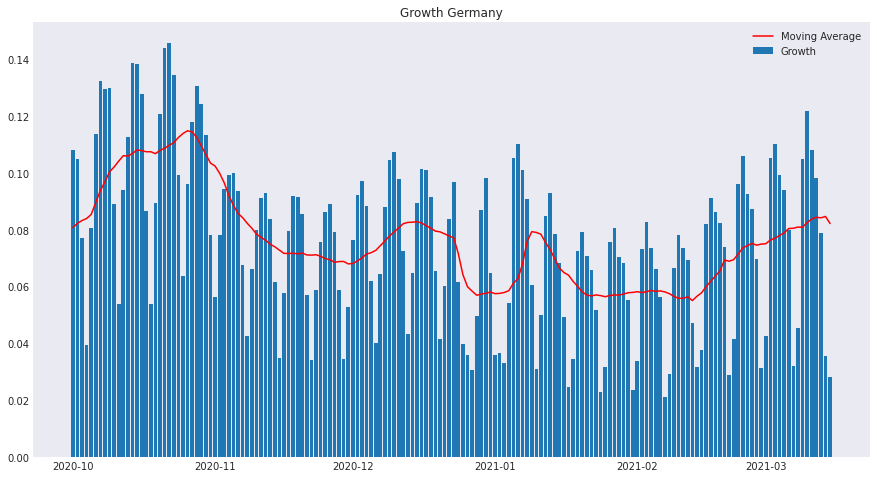

In [342]:
start_date = '10-01-2020'
x = rki[start_date:].index
plt.bar(x, rki.Growth[start_date:], label='Growth')
plt.plot(x, rki.Growth.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Growth Germany')

In [343]:
rki.tail(20)

NewCases  NewDeathRKI  NewRecoveredRKI  Case Fatality  \
Meldedatum                                                          
2021-02-24     11325        146.0             7992       1.289183   
2021-02-25      9953        124.0             7009       1.245856   
2021-02-26      9460        110.0             6646       1.162791   
2021-02-27      7679         57.0             5334       0.742284   
2021-02-28      3467         39.0             2444       1.124892   
2021-03-01      4696         76.0             2997       1.618399   
2021-03-02     10971         85.0             7399       0.774770   
2021-03-03     11307         53.0             4674       0.468736   
2021-03-04     10112         52.0             3560       0.514241   
2021-03-05      9669         44.0             2161       0.455063   
2021-03-06      8316         34.0             1286       0.408850   
2021-03-07      3370         27.0              333       0.801187   
2021-03-08      4825         36.0              335       0.746114   
2021-03-09     11484         38.0              573       0.330895   
2021-03-10     13966         29.0              441       0.207647   
2021-03-11     13021         19.0              223       0.145918   
2021-03-12     12363         10.0              127       0.080887   
2021-03-13     10305          7.0               49       0.067928   
2021-03-14      4725          1.0               29       0.021164   
2021-03-15      3758          4.0               13       0.106440   

            NewRecovered  NewDeath    Cases    Death  Recovered  ActiveCases  \
Meldedatum                                                                     
2021-02-24       10000.0     548.0  2417882  69448.0  2241440.0     106994.0   
2021-02-25        9099.0     393.0  2427835  69841.0  2250539.0     107455.0   
2021-02-26        8343.0     320.0  2437295  70161.0  2258882.0     108252.0   
2021-02-27        5485.0     146.0  2444974  70307.0  2264367.0     110300.0   
2021-02-28        3656.0     249.0  2448441  70556.0  2268023.0     109862.0   
2021-03-01        4232.0     325.0  2453137  70881.0  2272255.0     110001.0   
2021-03-02       16407.0     348.0  2464108  71229.0  2288662.0     104217.0   
2021-03-03       12623.0     308.0  2475415  71537.0  2301285.0     102593.0   
2021-03-04       10627.0     241.0  2485527  71778.0  2311912.0     101837.0   
2021-03-05        8610.0     179.0  2495196  71957.0  2320522.0     102717.0   
2021-03-06        7013.0     122.0  2503512  72079.0  2327535.0     103898.0   
2021-03-07        2571.0     186.0  2506882  72265.0  2330106.0     104511.0   
2021-03-08        3132.0     269.0  2511707  72534.0  2333238.0     105935.0   
2021-03-09        7702.0     255.0  2523191  72789.0  2340940.0     109462.0   
2021-03-10        8433.0     211.0  2537157  73000.0  2349373.0     114784.0   
2021-03-11        7232.0     178.0  2550178  73178.0  2356605.0     120395.0   
2021-03-12        6773.0     118.0  2562541  73296.0  2363378.0     125867.0   
2021-03-13        5383.0      81.0  2572846  73377.0  2368761.0     130708.0   
2021-03-14        2473.0     133.0  2577571  73510.0  2371234.0     132827.0   
2021-03-15        3010.0     146.0  2581329  73656.0  2374244.0     133429.0   

              Growth  
Meldedatum            
2021-02-24  0.105847  
2021-02-25  0.092625  
2021-02-26  0.087389  
2021-02-27  0.069619  
2021-02-28  0.031558  
2021-03-01  0.042691  
2021-03-02  0.105271  
2021-03-03  0.110212  
2021-03-04  0.099296  
2021-03-05  0.094132  
2021-03-06  0.080040  
2021-03-07  0.032245  
2021-03-08  0.045547  
2021-03-09  0.104913  
2021-03-10  0.121672  
2021-03-11  0.108152  
2021-03-12  0.098223  
2021-03-13  0.078840  
2021-03-14  0.035573  
2021-03-15  0.028165

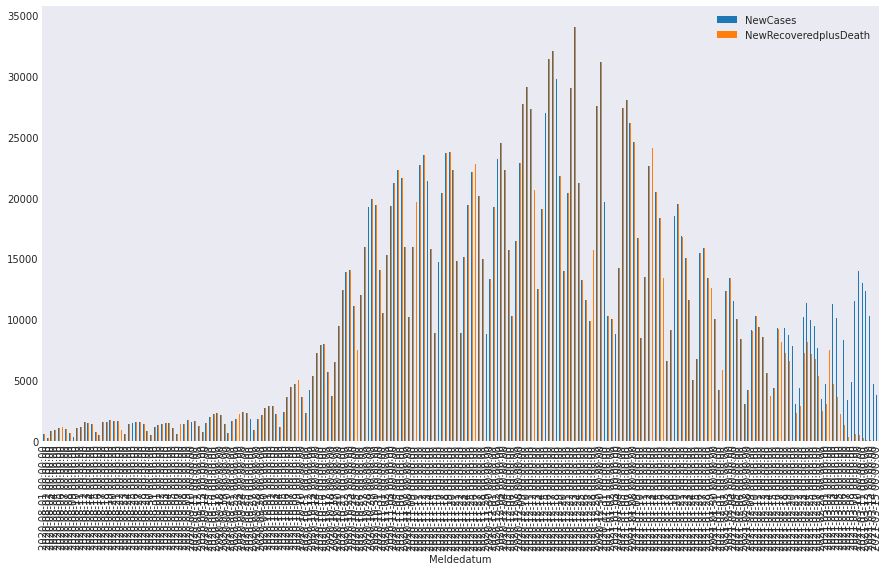

In [344]:
rki['NewRecoveredplusDeath'] = rki.NewRecoveredRKI + rki.NewDeathRKI
rki['08-01-2020':][['NewCases', 'NewRecoveredplusDeath']].plot.bar()
rki.drop('NewRecoveredplusDeath', axis=1, inplace=True)

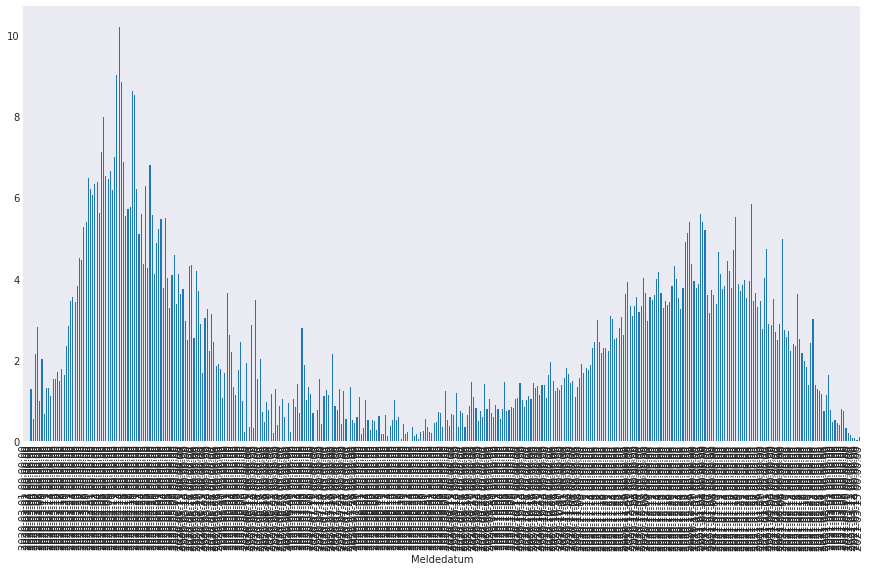

In [345]:
rki['Case Fatality']['03-01-2020':].plot.bar()

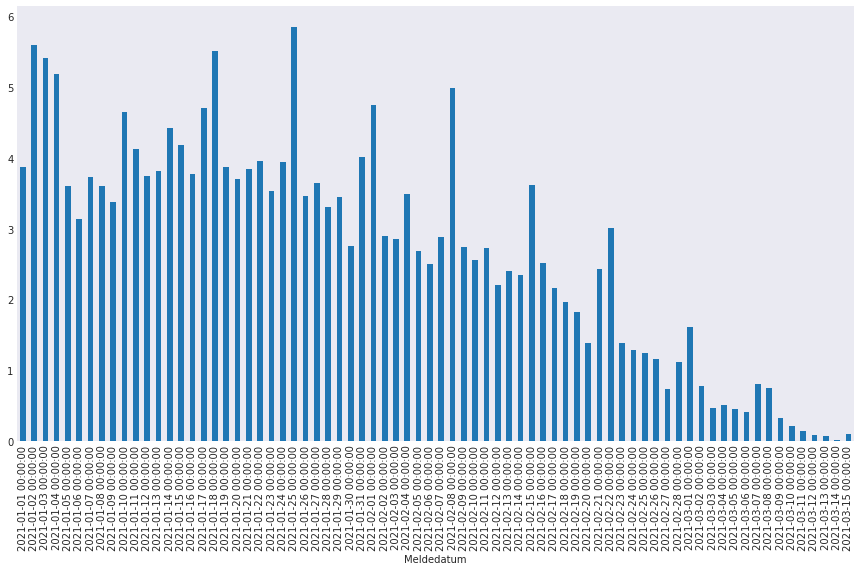

In [346]:
rki['Case Fatality']['01-01-2021':].plot.bar()

Text(0.5, 1.0, 'Case Fatality Germany (%)')

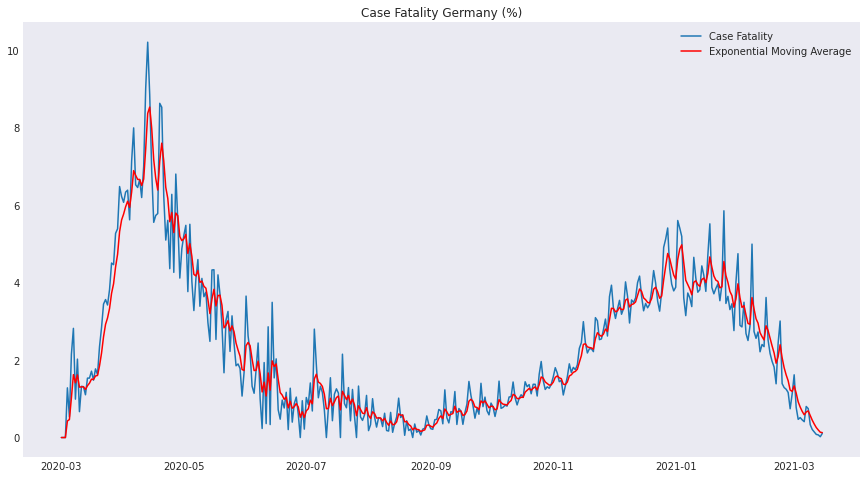

In [347]:
start_date = '03-01-2020'
x = rki[start_date:].index
plt.plot(x, rki['Case Fatality'][start_date:], label='Case Fatality')
plt.plot(x, rki['Case Fatality'].ewm(span=5,adjust=False).mean()[start_date:], label='Exponential Moving Average', color='red')
plt.legend(loc='best')
plt.title('Case Fatality Germany (%)')

Text(0.5, 1.0, 'Daily Covid Fatalities (PCR positive) under 60 years Germany')

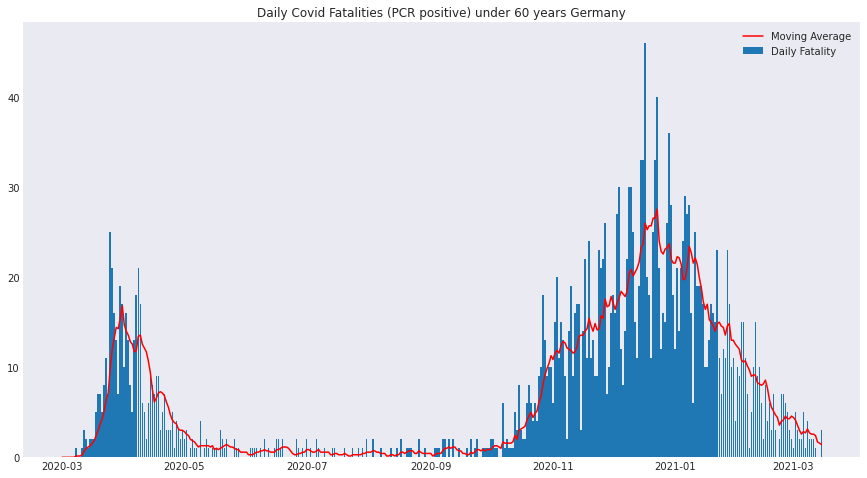

In [348]:
start_date = '03-01-2020'
x = rki_under60[start_date:].index
plt.bar(x, rki_under60.NewDeathRKI[start_date:], label='Daily Fatality')
plt.plot(x, rki_under60.NewDeathRKI.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Daily Covid Fatalities (PCR positive) under 60 years Germany')

Text(0.5, 1.0, 'Case Fatality (PCR positive) under 60 years Germany in %')

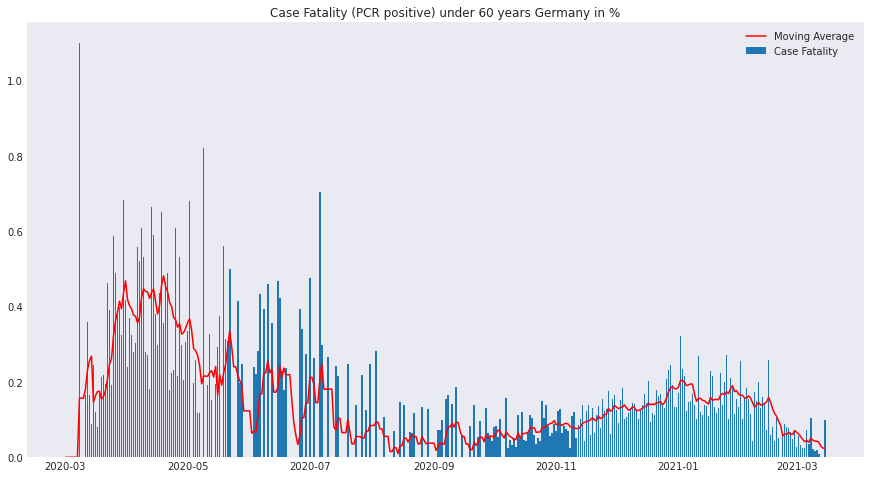

In [349]:
start_date = '03-01-2020'
x = rki_under60[start_date:].index
plt.bar(x, rki_under60['Case Fatality'][start_date:], label='Case Fatality')
plt.plot(x, rki_under60['Case Fatality'].rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Case Fatality (PCR positive) under 60 years Germany in %')